# List COM ports

In [1]:
import serial.tools.list_ports as list_ports
print('available COM ports:')
a = list_ports.comports()
for x in a:
    print(x)

available COM ports:
COM5 - USB-SERIAL CH340 (COM5)
COM4 - Lien série sur Bluetooth standard (COM4)
COM3 - Lien série sur Bluetooth standard (COM3)


# Basic commands

In [2]:
import PyLinkam as PL

In [3]:
TMS94 = PL.programmer('COM5')

In [4]:
TMS94.temperature

23.0

In [5]:
TMS94.error

'no error'

In [6]:
TMS94.status

'stopped'

In [7]:
TMS94.set_rate(10)

In [8]:
TMS94.rate

10

In [9]:
TMS94.set_limit(100)

In [10]:
TMS94.limit

100

In [11]:
TMS94.start()

In [12]:
TMS94.status

'heating'

In [13]:
TMS94.stop()

In [14]:
TMS94.status

'stopped'

In [15]:
TMS94.ser.close()

In [16]:
del TMS94

serial connection off


# Saving readings to file  

In [17]:
import time

In [18]:
import PyLinkam as PL

In [19]:
TMS94 = PL.programmer('COM5')

In [20]:
 #record temperature, status and error messages in a csv file
TMS94.datalog(interval = 0.1,  #s
              file = 'test.csv') #path of csv file 

In [33]:
#run command to perform your heat treatment
RT = 30 #°C
T_target = 60 #°C
holding_time = 60 #s
TMS94.set_rate(10) #°C/min

## heating
print('heating')
TMS94.set_limit(T_target) #°C
TMS94.start()
while TMS94.temperature < T_target:
    time.sleep(1) #s
    
## holding time
print('holding')
time.sleep(holding_time)

## cooling
print('cooling')
TMS94.set_limit(RT) #°C
while TMS94.temperature > RT:
    time.sleep(1) #s
TMS94.stop()



heating
holding
cooling


Exception in thread Thread-9:
Traceback (most recent call last):
  File "C:\Users\ebel\anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\ebel\anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "c:\users\ebel\documents\github\pylinkam\PyLinkam\PyLinkam.py", line 320, in log
    self.get_T_bytes()
  File "c:\users\ebel\documents\github\pylinkam\PyLinkam\PyLinkam.py", line 154, in get_T_bytes
    answer = self.query('T')
  File "c:\users\ebel\documents\github\pylinkam\PyLinkam\PyLinkam.py", line 88, in query
    answer =  self.read()
  File "c:\users\ebel\documents\github\pylinkam\PyLinkam\PyLinkam.py", line 54, in read
    answer = self.ser.readline()[0:-1] #last byte is a carriage return (useless)
  File "C:\Users\ebel\anaconda3\lib\site-packages\serial\serialwin32.py", line 269, in read
    raise PortNotOpenError()
serial.serialutil.PortNotOpenError: Attempting to use a port that is not open



In [21]:
# closing the serial connection stops data logging
TMS94.ser.close()

In [22]:
del TMS94

serial connection off


# plot datalog

In [23]:
file = 'test.csv'

In [24]:
import pandas as pd

In [25]:
datalog = pd.read_csv(file, names = ['t_s', 'T_C', 'status', 'error'])

In [26]:
datalog.head()

,t_s,T_C,status,error
0,0.000000,23.0,stopped,no error
1,0.141962,23.0,stopped,no error
2,0.260050,23.0,stopped,no error
3,0.389738,23.0,stopped,no error
4,0.516951,23.0,stopped,no error


<AxesSubplot:xlabel='t (s)', ylabel='T (°C)'>

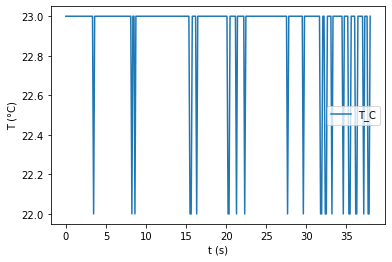

In [27]:
datalog.plot(x = 't_s', 
             y = 'T_C', 
             xlabel = 't (s)', 
             ylabel = 'T (°C)')

# Pyqt app

In [11]:
from PyLinkam import  ControllerDisplay

In [12]:
ControllerDisplay('COM5', 'TMS94', verbose = True)

create programmer object
create programmer thread
create app
running
serial connection off
